# Image Classifier

In [1]:
import tensorflow as tf
import os

## Filtering images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\cats\02-cat-training-NationalGeographic_1484324_3x4.jpg
Image not in ext list data\cats\1800x1200_cat_relaxing_on_patio_other.jpg
Image not in ext list data\cats\cat-Alison-Eldridge-orange-Calico.jpg
Image not in ext list data\cats\cat-toes-paw-number-paws-tiger-tabby.jpg
Image not in ext list data\cats\cats-party-0516221.jpg
Image not in ext list data\cats\domestic-cat_thumb_square.jpg
Image not in ext list data\cats\Domestic-feline-tabby-cat.jpg
Image not in ext list data\cats\Hamba-20191-A-Sliwa.jpg
Image not in ext list data\cats\Himalayan-chocolate-point.jpg
Image not in ext list data\cats\p07ryyyj.jpg
Image not in ext list data\dogs\0422_DOGS_LEAD_trans_NvBQzQNjv4BqqVzuuqpFlyLIwiB6NTmJwfSVWeZ_vEN7c6bHu2jJnT8.jpg
Image not in ext list data\dogs\Bernese-mountain-dog-grass.jpg
Image not in ext list data\dogs\domestic-dog_thumb_2x1.jpg
Image not in ext list data\dogs\domestic-dog_thumb_3x4.jpg
Image not in ext list data\dogs\German-shepherd.jpg
Image not in

## Loading Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size = 32, label_mode = 'categorical')

Found 236 files belonging to 3 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

C:\Users\Mark\.julia\conda\3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


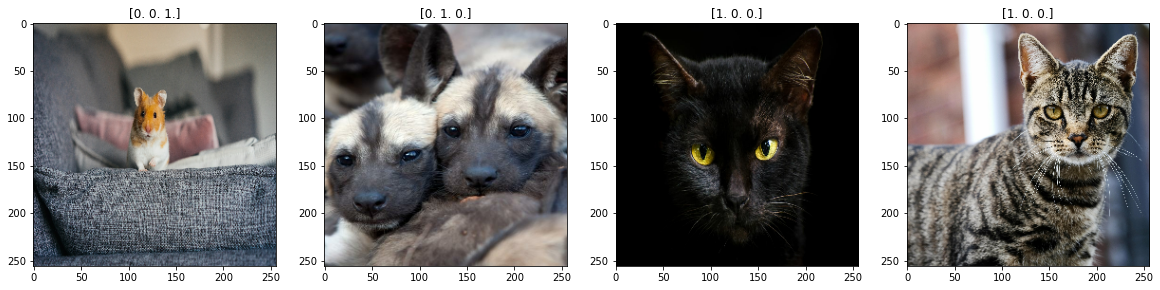

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling the Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.44338235, 0.39632353, 0.0747549 ],
          [0.4509804 , 0.40392157, 0.08235294],
          [0.45433947, 0.40728065, 0.08571203],
          ...,
          [0.23766084, 0.2690334 , 0.27687654],
          [0.23569192, 0.26706448, 0.27490762],
          [0.23910318, 0.27047575, 0.27831888]],
 
         [[0.44705883, 0.4       , 0.07843138],
          [0.4509804 , 0.40392157, 0.08235294],
          [0.45343137, 0.40637255, 0.08480392],
          ...,
          [0.24114057, 0.27251312, 0.28035626],
          [0.23967381, 0.27104637, 0.2788895 ],
          [0.24304487, 0.2744174 , 0.28226054]],
 
         [[0.4509804 , 0.40392157, 0.08235294],
          [0.44705883, 0.4       , 0.07843138],
          [0.4495098 , 0.40245098, 0.08088236],
          ...,
          [0.23878533, 0.27015787, 0.278001  ],
          [0.23645067, 0.26782322, 0.27566636],
          [0.24012715, 0.2714997 , 0.27934283]],
 
         ...,
 
         [[0.04584004, 0.05805664, 0.06866479],
          [0.05163

## Three way data split

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [23]:
train_size

5

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Learning Model

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [29]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training the model

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 19s 3s/step - loss: 1.3616 - accuracy: 0.2625 - val_loss: 1.1570 - val_accuracy: 0.3750
Epoch 2/20
5/5 [==============================] - 15s 3s/step - loss: 1.0934 - accuracy: 0.3938 - val_loss: 1.0801 - val_accuracy: 0.3438
Epoch 3/20
5/5 [==============================] - 16s 3s/step - loss: 1.0761 - accuracy: 0.4250 - val_loss: 1.0462 - val_accuracy: 0.5625
Epoch 4/20
5/5 [==============================] - 15s 3s/step - loss: 0.9895 - accuracy: 0.5312 - val_loss: 1.0687 - val_accuracy: 0.3438
Epoch 5/20
5/5 [==============================] - 14s 2s/step - loss: 0.9177 - accuracy: 0.5375 - val_loss: 0.8130 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 14s 2s/step - loss: 0.7378 - accuracy: 0.7375 - val_loss: 0.6750 - val_accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 14s 2s/step - loss: 0.7052 - accuracy: 0.7250 - val_loss: 0.5906 - val_accuracy: 0.7812
Epoch 8/20
5/5 [==================

## Ploting Performance

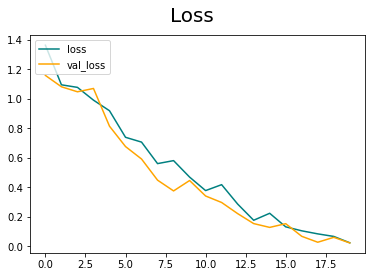

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

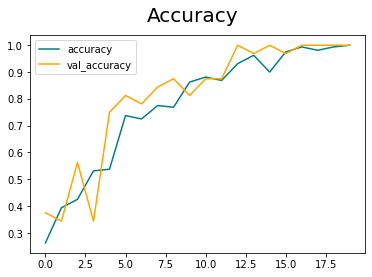

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation of model

In [39]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 562ms/step


In [43]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Testing on unseen data

In [44]:
import cv2

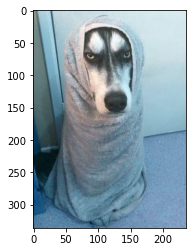

In [63]:
img = cv2.imread('dog.jpg')
plt.imshow(img)
plt.show()

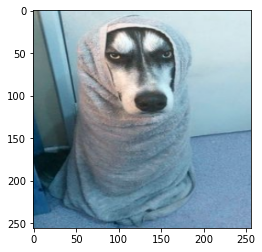

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 172ms/step


In [66]:
yhat

array([[0.17724167, 0.0072975 , 0.8154608 ]], dtype=float32)

In [67]:
if yhat[0][0] > yhat[0][1] and yhat[0][0] > yhat[0][2]: 
    print(f'Predicted class is Cat')
elif yhat[0][1] > yhat[0][0] and yhat[0][1] > yhat[0][2]:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Hamster')

Predicted class is Hamster


## Saving the Model

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save(os.path.join('models','imageclassifier.h5'))

In [70]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [71]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 228ms/step


array([[0.17724167, 0.0072975 , 0.8154608 ]], dtype=float32)

In [ ]:
if yhat[0][0] > yhat[0][1] and yhat[0][0] > yhat[0][2]: 
    print(f'Predicted class is Cat')
elif yhat[0][1] > yhat[0][0] and yhat[0][1] > yhat[0][2]:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Hamster')